In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CASE STUDY -----> STUDENT DATASET

In [3]:
df = pd.read_csv('/content/student_data.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [4]:
# Case Study 1: Data Cleaning & Standardization

# Removing unwanted column

df.drop(columns=['Unnamed: 0'], inplace=True)

df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [5]:
# Convert weekly study hours to numeric

df['WklyStudyHours'] = pd.to_numeric(df['WklyStudyHours'], errors='coerce')

df['WklyStudyHours']

,WklyStudyHours
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
30636,NaN
30637,NaN
30638,NaN
30639,NaN


In [6]:
# Standardize categorical columns

df['Gender'] = df['Gender'].str.capitalize()
df['Gender']

,Gender
0,Female
1,Female
2,Female
3,Male
4,Male
...,...
30636,Female
30637,Male
30638,Female
30639,Female


In [7]:
# Fill missing ParentEduc with mode

mode_value = df['ParentEduc'].mode()[0]
df['ParentEduc'].fillna(mode_value, inplace=True)
df['ParentEduc']



/tmp/ipython-input-584621852.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ParentEduc'].fillna(mode_value, inplace=True)


,ParentEduc
0,bachelor's degree
1,some college
2,master's degree
3,associate's degree
4,some college
...,...
30636,high school
30637,high school
30638,high school
30639,associate's degree


In [8]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,Female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,NaN,71,71,74
1,Female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,NaN,69,90,88
2,Female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,NaN,87,93,91
3,Male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,NaN,45,56,42
4,Male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,NaN,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,Female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,NaN,59,61,65
30637,Male,group E,high school,standard,none,single,regularly,no,1.0,private,NaN,58,53,51
30638,Female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,NaN,61,70,67
30639,Female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,NaN,82,90,93


In [9]:
# Case Study 2: Handling Missing Values

df['EthnicGroup'].fillna('Unknown', inplace=True)

df

/tmp/ipython-input-2691436146.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EthnicGroup'].fillna('Unknown', inplace=True)


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,Female,Unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,NaN,71,71,74
1,Female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,NaN,69,90,88
2,Female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,NaN,87,93,91
3,Male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,NaN,45,56,42
4,Male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,NaN,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,Female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,NaN,59,61,65
30637,Male,group E,high school,standard,none,single,regularly,no,1.0,private,NaN,58,53,51
30638,Female,Unknown,high school,free/reduced,completed,married,sometimes,no,1.0,private,NaN,61,70,67
30639,Female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,NaN,82,90,93


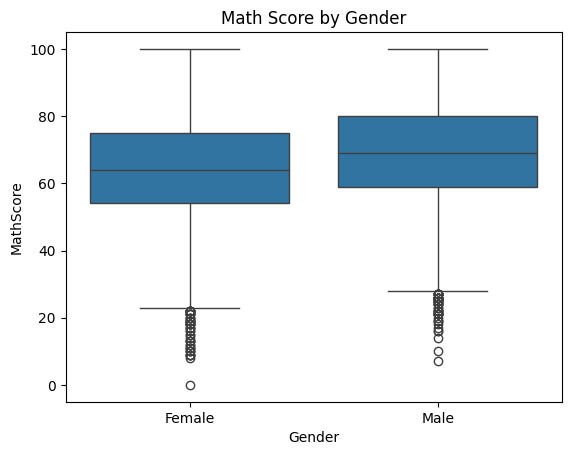

In [10]:
# Case Study 3: Exploratory Data Analysis – Gender & Scores

sns.boxplot(x='Gender', y='MathScore', data=df)
plt.title("Math Score by Gender")
plt.show() # box plot is depending on mode

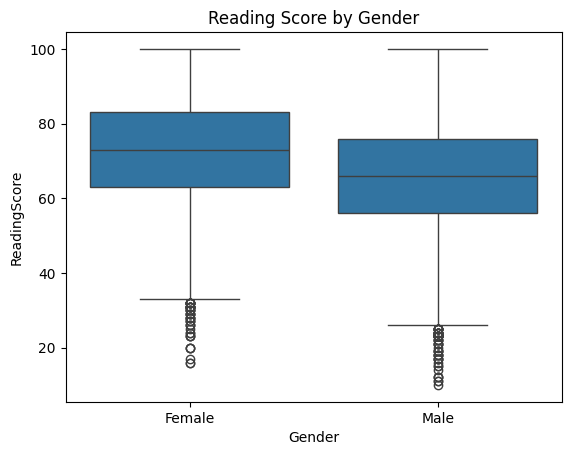

In [11]:
sns.boxplot(x='Gender', y='ReadingScore', data=df)
plt.title("Reading Score by Gender")
plt.show()

In [12]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,Female,Unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,NaN,71,71,74
1,Female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,NaN,69,90,88
2,Female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,NaN,87,93,91
3,Male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,NaN,45,56,42
4,Male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,NaN,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,Female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,NaN,59,61,65
30637,Male,group E,high school,standard,none,single,regularly,no,1.0,private,NaN,58,53,51
30638,Female,Unknown,high school,free/reduced,completed,married,sometimes,no,1.0,private,NaN,61,70,67
30639,Female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,NaN,82,90,93


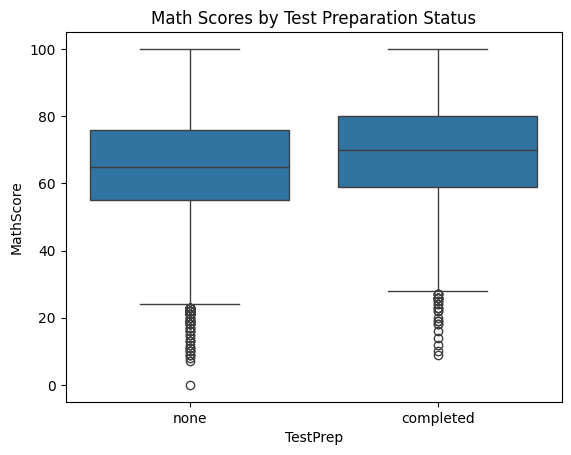

In [13]:
# Case Study 4: Effect of Test Preparation on Scores

sns.boxplot(x='TestPrep', y='MathScore', data=df)
plt.title("Math Scores by Test Preparation Status")
plt.show()

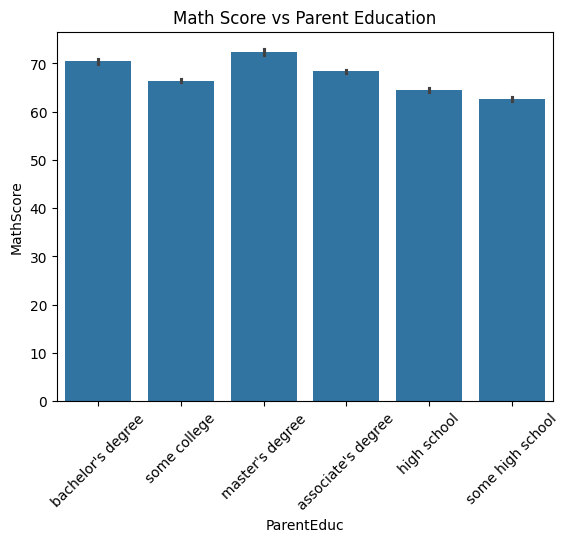

In [14]:
# Case Study 5: Parent Education & Student Performance

sns.barplot(x='ParentEduc', y='MathScore', data=df)
plt.xticks(rotation=45)
plt.title("Math Score vs Parent Education")
plt.show()

In [15]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,Female,Unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,NaN,71,71,74
1,Female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,NaN,69,90,88
2,Female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,NaN,87,93,91
3,Male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,NaN,45,56,42
4,Male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,NaN,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,Female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,NaN,59,61,65
30637,Male,group E,high school,standard,none,single,regularly,no,1.0,private,NaN,58,53,51
30638,Female,Unknown,high school,free/reduced,completed,married,sometimes,no,1.0,private,NaN,61,70,67
30639,Female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,NaN,82,90,93


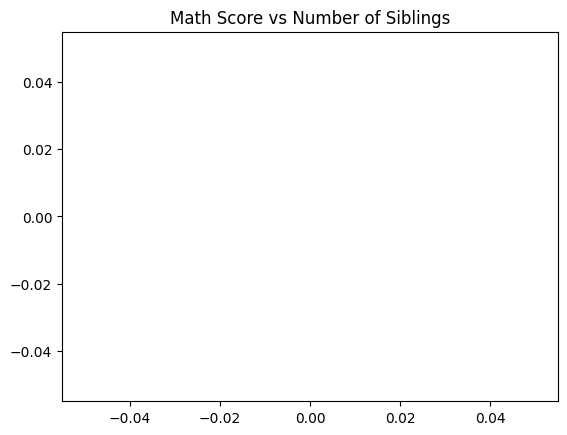

In [16]:
# Case Study 6: Sibling Count & Study Hours vs Performance

sns.scatterplot(x='WklyStudyHours', y='NrSiblings', data=df)
plt.title("Math Score vs Number of Siblings")
plt.show()

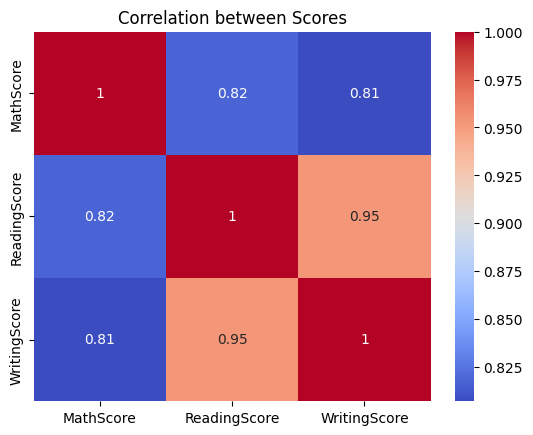

In [17]:
# Case Study 7: Correlation Analysis

corr_matrix = df[['MathScore','ReadingScore','WritingScore']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Scores")
plt.show()


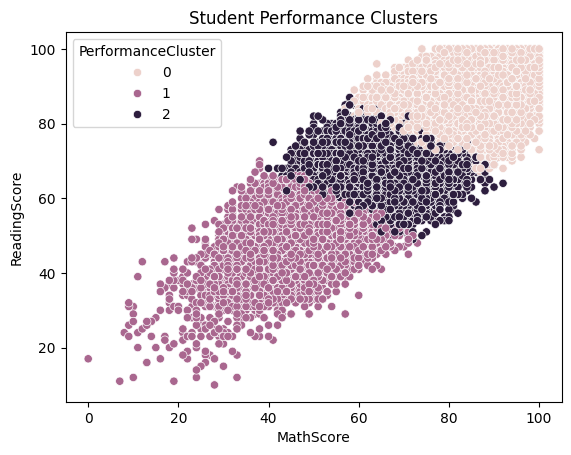

In [18]:
# Case Study 8: Clustering Students Based on Scores

from sklearn.cluster import KMeans  # Analyses each value and fills in that range
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['MathScore', 'ReadingScore', 'WritingScore']])
kmeans = KMeans(n_clusters=3, random_state=42)
df['PerformanceCluster'] = kmeans.fit_predict(scaled_data)
sns.scatterplot(x='MathScore', y='ReadingScore', hue='PerformanceCluster', data=df)
plt.title("Student Performance Clusters")
plt.show()